In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
grd = pd.read_csv('../data/graphene_data_final.csv')

In [3]:
grd

,Graphene_percentage,FEED,RPM,DOC,MRR_gm_per_sec,Ra
0,0.00,100,1000,0.10,0.012697,0.418
1,0.00,100,1000,0.15,0.020327,0.959
2,0.00,100,1000,0.20,0.031002,0.331
3,0.00,100,2000,0.10,0.012720,0.378
4,0.00,100,2000,0.15,0.019914,0.441
...,...,...,...,...,...,...
130,0.03,200,2000,0.15,0.041111,0.708
131,0.03,200,2000,0.20,0.050602,0.586
132,0.03,200,3000,0.10,0.021910,0.906
133,0.03,200,3000,0.15,0.038930,0.927


In [4]:
grd.corr()

,Graphene_percentage,FEED,RPM,DOC,MRR_gm_per_sec,Ra
Graphene_percentage,1.000000e+00,-4.862912e-17,-4.189586e-17,-1.643863e-17,-0.040645,0.082983
FEED,-4.862912e-17,1.000000e+00,3.233759e-18,0.000000e+00,0.590197,0.191750
RPM,-4.189586e-17,3.233759e-18,1.000000e+00,0.000000e+00,0.022629,-0.305373
DOC,-1.643863e-17,0.000000e+00,0.000000e+00,1.000000e+00,0.716658,-0.034006
MRR_gm_per_sec,-4.064458e-02,5.901971e-01,2.262917e-02,7.166582e-01,1.000000,0.124521
Ra,8.298294e-02,1.917504e-01,-3.053734e-01,-3.400605e-02,0.124521,1.000000


In [5]:
(grd.corr()>0.1).astype('float')

,Graphene_percentage,FEED,RPM,DOC,MRR_gm_per_sec,Ra
Graphene_percentage,1.0,0.0,0.0,0.0,0.0,0.0
FEED,0.0,1.0,0.0,0.0,1.0,1.0
RPM,0.0,0.0,1.0,0.0,0.0,0.0
DOC,0.0,0.0,0.0,1.0,1.0,0.0
MRR_gm_per_sec,0.0,1.0,0.0,1.0,1.0,1.0
Ra,0.0,1.0,0.0,0.0,1.0,1.0


In [6]:
grd.corr()*(grd.corr()>0.1).astype('float')

,Graphene_percentage,FEED,RPM,DOC,MRR_gm_per_sec,Ra
Graphene_percentage,1.0,-0.000000,-0.0,-0.000000,-0.000000,0.000000
FEED,-0.0,1.000000,0.0,0.000000,0.590197,0.191750
RPM,-0.0,0.000000,1.0,0.000000,0.000000,-0.000000
DOC,-0.0,0.000000,0.0,1.000000,0.716658,-0.000000
MRR_gm_per_sec,-0.0,0.590197,0.0,0.716658,1.000000,0.124521
Ra,0.0,0.191750,-0.0,-0.000000,0.124521,1.000000


In [7]:
grd.columns[:4]

Index(['Graphene_percentage', 'FEED', 'RPM', 'DOC'], dtype='object')

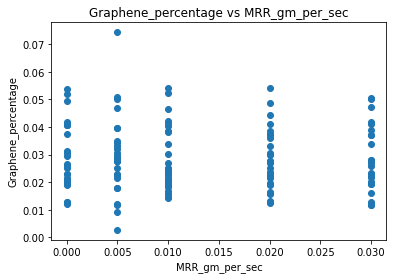

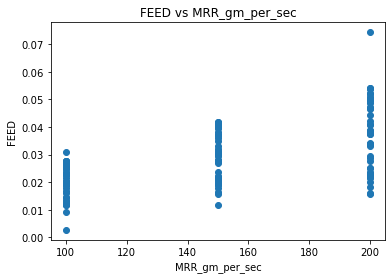

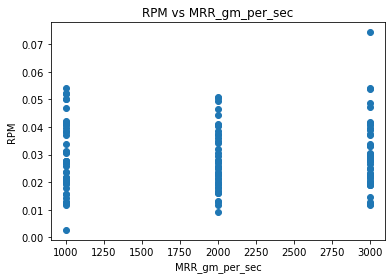

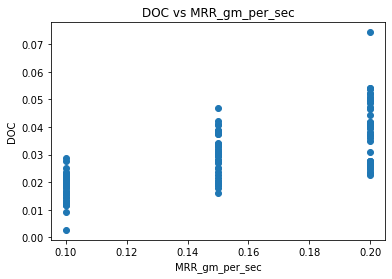

In [8]:
num_ = 1
for i in grd.columns[:4]:
    plt.figure(num = num_)
    num_ += 1
    plt.scatter(grd[i],grd['MRR_gm_per_sec'])
    plt.ylabel(i)
    plt.xlabel('MRR_gm_per_sec')
    plt.title(i+' vs MRR_gm_per_sec')

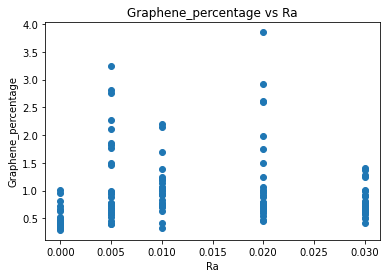

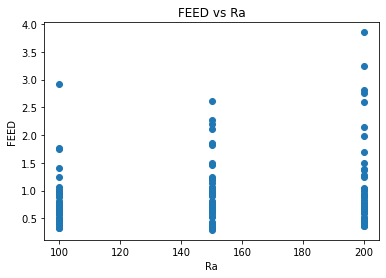

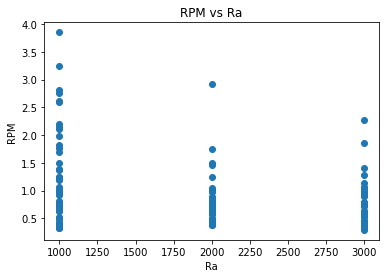

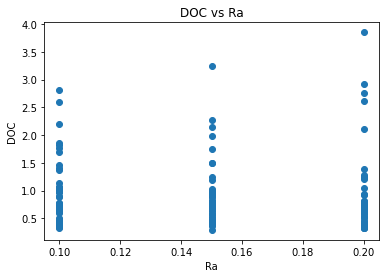

In [9]:
num_ = 1
for i in grd.columns[:4]:
    plt.figure(num = num_)
    num_ += 1
    plt.scatter(grd[i],grd['Ra'])
    plt.ylabel(i)
    plt.xlabel('Ra')
    plt.title(i+' vs Ra')

In [10]:
print(grd['Graphene_percentage'].unique())
print(grd['FEED'].unique())
print(grd['RPM'].unique())
print(grd['DOC'].unique())

[0.    0.005 0.01  0.02  0.03 ]
[100 150 200]
[1000 2000 3000]
[0.1  0.15 0.2 ]
